# Machine learning avec les modules Python tensorflow2/keras 

# Entraînement / exploitation d'un réseau de neurones dense pour la reconnaissance de chiffres manuscrits

### Utiliser un environnement virtuel Python

<div class="alert alert-block alert-danger">
<span style="color:brown;font-family:arial;font-size:normal"> 
    L'état de l'art des projets de <i>machine learning</i> sous Python préconise l'utilisation d'un <span style="font-weight:bold;">Environnement Virtuel Python</span> (EVP) qui permet de maîtriser pour chaque projet les versions de l'interpréteur Python et des modules "sensibles" (comme tensorflow par exemple).</span></div>

Pour travailler avec ce <i>notebook</i>, tu dois utiliser le module <b>tensorflow</b> en version 2.4.1 dans l'EVP <b><span style="color: rgb(200, 51, 102);">minfo</span></b> que tu utilises déjà pour les activités Python à l'ENSAM.<br><br>

Pour faciliter l'installation des modules Python dans les bonnes versions tu peux utiliser suivre la procédure suivante :
<ol>
    <li>
        Ouvre une console <b><span style="font-family:courier;">Anaconda Prompt</span></b> (Windows) ou un terminal (Mac, GNU/Linux),</li>
    <li>Active ton EVP <b><span style="color: rgb(200, 51, 102);">minfo</span></b> en tapant la commande : <b><span style="font-family: courier; color: rgb(153, 51, 102);" class="">conda activate minfo</span></b></li>
    <li>Positionne-toi dans le dossier <b><span style="font-family: courier; color: rgb(0, 0, 255);" class="">APP-ML</span></b> avec la commande :<br>
        (Windows)&nbsp;&nbsp; ↝ <b><span style="font-family: courier; color: rgb(153, 51, 102);" class="">cd C:\&lt;chemin du dossier APP-ML copié/collé depuis le navigateur de fichiers&gt;</span></b><br>
        (Mac/Linux) ↝ <b><span style="font-family: courier; color: rgb(153, 51, 102);" class="">cd /home/...quelque part..../APP-ML</span></b>
    </li>
    <li>Charge les modules requis en tapant la commande : <b><span style="font-family: courier; color: rgb(153, 51, 102);" class="">pip install -r requirements.txt</span></b>
    </li>
</ol>
Les modules et leurs dépendances sont téléchargés et installés.... cela demande de la bande passante internet et du temps. Une fois les modules installés, tu peux continuer la suite de ce <i>notebook</i>.

## Import des modules Python

In [1]:
import tensorflow as tf
from tensorflow import keras
import sys, cv2
print(f"Python    : {sys.version.split()[0]}")
print(f"tensorflow: {tf.__version__} incluant keras {keras.__version__}")
print(f"OpenCV    : {cv2.__version__}")

Python    : 3.6.12
tensorflow: 2.4.1 incluant keras 2.4.0
OpenCV    : 4.5.1


Incrustation des tracés matplotlib dans le notebook et import de modules utiles :

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

### Documentation tensorflow/keras

Le module **keras** qui permet une manipulation de haut niveau des objets **tensorflow** est intégré dans tensorflow2. <br>
La documentation du module **tf.keras** à consulter pour ce TP est ici : https://www.tensorflow.org/api_docs/python/tf/keras. 

### La banque d'images MNIST

Dans ce TP nous utilisons les images labelisées de la banque MNIST disponible sur Internet (http://yann.lecun.com/exdb/mnist/).

La banque MNIST contient 70000 images de chiffres manuscrits en ton de gris de 28 $\times$ 28 pixels : chaque image  correspond à une matrice 28 $\times$ 28 de nombres `uint8` (entiers positifs sur bits, dans l'intervalle [0 ; 255]).<br>
Les 70000 images du MNIST sont regoupées en un jeu de **60000 images d'apprentissage** et un jeu de **10000 images de test**.

<div class="alert alert-block alert-danger">
L'évaluation des performances d'un réseau entraîné doit toujours se faire avec un jeu de données différent du jeu d'entraînement : c'est pour cela que la banque MNIST propose 10000 images de test <b>différentes</b> des 60000 images d'entraînement.
</div>
<p style="text-align:center; font-style:italic; font-size:12px;">
<img src="img/MNIST_digits_sample.png" width="500"><br>
[crédit image : JLC]
</p>

# A/ Quelques rappels sur les réseaux de neurones denses

## Le neurone artificiel
C'est une unité de traitement informatique qui reçoit des entrées $(x_i)_{i=1...n}$ et calcule la valeur de sa **fonction d'activation** en un point défini par la **combinaison linéaire de ses entrées** $\sum_i \omega_i x_i - b$ :

<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="./img/nn_1.png" width="600" ><br>
    [crédit image : JLC]
</p>

L'entrée *Bias* reçoit le stimuli `-1` affecté du poids $b$ : il permet de décaler le point où la fonction d'activation est calculée.

## Fonction d'activation

Principaux rôles :

- introduire dans le neurone un comportement **non linéaire** (comme des mécanismes de seuil, de saturation...)
- fixer la plage de sortie de la valeur calculée par le neurone, par exemple dans l'intervalle $[-1 ; 1]$, $[0 ; 1]$ ou encore $[0 ; +\infty[$

Exemples de fonctions d'activations couramment utilisées :<br />
<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="./img/activationFunctions.png" width="950"><br>
    [crédit image : JLC]
</p>

# B/ Structure du réseau dense à construire 
Dans ce premier TP,  nous allons construire un **réseau dense**, avec :
- une **couche d'entrée** de 784 valeurs comprises entre 0 et 1 (les pixels des image MNIST 28 $\times$ 28 mis sous forme d'un vecteur de 784 nombres `float` normalisés),
- une **couche cachée** de 784 neurones utilisant la fonction d'activation `relu`,
- une **couche de sortie** à 10 neurones, pour la classification des images en 10 classes associées aux chiffres {0,1,2...9}, utilisant la fonction d'activation `softmax` adaptée aux problèmes de classification.

<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="img/archiReseau.png" alt="archiReseau.png" style="width: 900px;"><br> 
    [crédit image : JLC]
</p>

Remarques : 
- Chaque neurone de la première couche cachée reçoit 785 entrées : les 784 valeurs $x_i$ des pixels de l'image plus le biais. 
- $\leadsto$ Il y a donc 785 inconnues pour chaque neurone : les 784 poids $w_i$ affectés à chaque entrée $x_i$, plus le  poids $b$ affecté à l'entrée $-1$.
- $\leadsto$ on compte donc 785 $\times$ 784 inconnues pour la couche cachée et 785 $\times$ 10 inconnues pour la couche de sortie : soit un total de 623290 inconnues dont la valeur doit être optimisée par l'algorithme d'apprentissage du réseau.

### Fonction d'activation softmax

La fonction `softmax` calcule pour chaque neurone de sortie $k$ la valeur $\displaystyle{Y_k = \frac{e^{y_k}}{\sum_i{e^{y_i}}}}$, où $y_k$ désigne la combinaison linéaire $\sum_i \omega_i x_i - b$ calculée par le neurone $k$.


`softmax` associe ainsi à chacune des sorties $y_k$ une valeur $Y_k \in [0, 1]$ qui peut être interprétée comme la probablité de la sortie $k$ : on obtient une valeur proche de 1 pour le neurone fournissant la valeur $y_i$ la plus grande, et quasiment 0 pour tous les autres.

<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="img/softmax.png" width="400"><br>
    [crédit image : JLC]
</p>


### Catégorisation des labels (*one-hot coding*)

Les labels des images sont des entiers entre 0 et 9 désignant les chiffres de '0' à '9' alors que la sortie du réseau est un ensemble de 10 valeurs `float` comprises entre 0 et 1 (un vecteur de 10 `float`).<br>
Pour faciliter la comparaison entre le label associé à une image et la sortie du réseau calculée pour cette image, on utilise la catégorisation *one-hot coding* qui associe à un scalaire un vecteur dont les éléments sont tous nuls sauf un.
Dans le cas des 10 classes correspondant aux labels '0' à '9', la représentation _one-hot coded_ donne :

| chiffre|   | $Y'_i$ : vecteur _one-hot_     |
|:-------|---|----------------------:|
| 0      |   | [1 0 0 0 0 0 0 0 0 0] |
| 1      |   | [0 1 0 0 0 0 0 0 0 0] |
| 2      |   | [0 0 1 0 0 0 0 0 0 0] |
| 3      |   | [0 0 0 1 0 0 0 0 0 0] |
| 4      |   | [0 0 0 0 1 0 0 0 0 0] |
| 5      |   | [0 0 0 0 0 1 0 0 0 0] |
| 6      |   | [0 0 0 0 0 0 1 0 0 0] |
| 7      |   | [0 0 0 0 0 0 0 1 0 0] |
| 8      |   | [0 0 0 0 0 0 0 0 1 0] |
| 9      |   | [0 0 0 0 0 0 0 0 0 1] |

### Calcul de l'erreur d'inférence du réseau

Pendant la phase d'entraînement du réseau, chaque image en entrée du réseau donne un vecteur de probabilités en sortie (inférence calculée par le réseau) qui peut être comparé à la représentation *hot-one* du label associé à l'image d'entrée.

On peut utiliser l'erreur *cross entropy*  ($-\sum_i{Y'_i.\log{Y_i}}$) qui mesure l'écart entre la représentation *one-hot* du label et la réponse du réseau :

<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="img/CrossEntropy.png" width=600><br>
    [crédit image : vidéo "Deep Learning TensorFlow" de Martin Gorner]
</p>


### Backpropagation error

L'algorithme de **rétropropagation de l'erreur** permet de modifier les poids des couches du réseau pour minimiser l'erreur entre _valeur attendue_ et _valeur calculée_ par le réseau. Grâce à l'itération du procédé, les poids du réseau convergent vers un état qui minimize l'erreur d'inférence du réseau. Ce mécanisme d'apprentissage utilisé avec toutes les images finit par donner un réseau entraîné.

### Optimiseur

La recherche du minimum de la fonction d'erreur est confié à un **optimiseur** :  un des algorithmes les plus simples est la __descente de gradient__ (GD), qui consiste à se déplacer dans le sens de la pente la plus forte à chaque itération :

__Adam__ est un optimiseur plus complexe que __GD__.  Sur l'animation ci-dessou on voit plusieurs optimiseurs se déplacer sur une fonction de coût ne comportant que 2 paramètres (au lieu de plusieurs milliers...) à la recherche d'un minimum. 


<p style="text-align:center; font-style:italic; font-size:12px;">
    <i>(Numbers in figure legend indicate learning rate, specific to each Optimizer)</i><br>
    <img src="https://github.com/Jaewan-Yun/optimizer-visualization/raw/master/figures/movie11.gif" width="600"><br>
    <i>(source : github.com/Jaewan-Yun/optimizer-visualization/raw/master/figures/movie11.gif)</i>
</p>

## C/ Travail à faire

### Reproductibilité des générateurs pseudo-aléatoires

Les poids d'un réseau de neurones sont initialisés par tirage aléatoire ; lorsqu'on invoque plusieurs fois de suite des générateurs pseudo-aléatoires on obtient une séquence aléatoire différente à chaque invocation. Par exemple avec `numpy.random.rand` :

In [3]:
import numpy as np
print(np.random.rand(4))

[0.15449318 0.91016339 0.78831064 0.28606475]


In [4]:
print(np.random.rand(4))

[0.80739641 0.70220474 0.71546677 0.49992378]


Ce comportement peut perturber l'étude des performances d'un réseau entraîné en fonction des paramètres de construction ou d'entraînement : à chaque fois qu'on exécute la cellule ou le notebook avec de nouvelles valeurs des paramètres, on risque d'obtenir un état initial du réseau différent, conduisant à un état du réseau entraîné différent... ce qui peut gêner les comparaisons.

Une solution pour éviter ce phénomène consiste à fixer la **graine** (*seed*) des générateurs aléatoires de façon à produire des **séquences aléatoires reproductibles**.<br>

Les cellules suivantes illustrent le mécanisme :

In [5]:
SEED = 43

In [6]:
np.random.seed(SEED)
np.random.rand(5)

array([0.11505457, 0.60906654, 0.13339096, 0.24058962, 0.32713906])

In [7]:
np.random.seed(SEED)
np.random.rand(5)

array([0.11505457, 0.60906654, 0.13339096, 0.24058962, 0.32713906])

Pour appliquer ce mécanisme aux calculs faits avec tensorflow, on pourra utiliser la fonction `set_seed` (cf page [tf.random.set_seed](https://www.tensorflow.org/api_docs/python/tf/random/set_seed)) :
**`tf.random.set_seed(SEED)`**

## 1 - Récupération des images MNIST

Consulter la documentation de la fonction `load_data` sur la page [tf.keras.datasets.mnist.load_data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data) puis compléter la cellule ci-dessous pour charger les données du MNIST en nommant les données renvoyées :<br>
- `im_train`, `lab_train` pour les images et les labels d'entraînement,
- `im_test`, `lab_test` pour les images et les labels de test.

(En cas de message d'erreur de type _"SSL error...."_ pour téléchager les données du MNIST, voir [Python SSL Certification Problems in Tensorflow](https://stackoverflow.com/questions/46858630/python-ssl-certification-problems-in-tensorflow))

In [8]:
(im_train, lab_train), (im_test, lab_test) = tf.keras.datasets.mnist.load_data()

La cellule ci-dessous affiche les attributs `shape` et `dtype` des tableaux numpy obtenus : les valeurs sont-elles cohérentes ? pourquoi ?

In [9]:
print("im_train -> shape:", im_train.shape, ", dtype:", im_train.dtype,)
print("im_test  -> shape:", im_test.shape,  ", dtype:", im_test.dtype,)
print("lab_train-> shape:", lab_train.shape,  ", dtype:", lab_train.dtype)
print("lab_test -> shape:", lab_test.shape,  ", dtype:", lab_test.dtype)

im_train -> shape: (60000, 28, 28) , dtype: uint8
im_test  -> shape: (10000, 28, 28) , dtype: uint8
lab_train-> shape: (60000,) , dtype: uint8
lab_test -> shape: (10000,) , dtype: uint8


### Visualisation des images et des étiquettes :

Avec la fonction `imshow` du module `matplotlib.pyplot` faire afficher en tons de gris la 601-ème image du tableau `im_train`.<br>
Indications :
- utiliser `plt.figure(figsize=(2,2))` pour fixer la taille de l'image
- utiliser l'option `cmap='gray'` de `imshow` pour l'affichage en ton de gris
- enlever les graduations en X et Y (par exemple avec `plt.xticks([]); plt.yticks([])`).

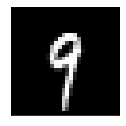

In [10]:
plt.figure(figsize=(2,2))
plt.imshow(im_train[600], cmap='gray')
plt.xticks([]); plt.yticks([]);

Vérifier que le label MNIST associé à `im_train[600]` correspond bien à ce qu'on voir sur l'image....

In [11]:
lab_train[600]

9

La fonction `plot_images` définie ci-dessous prends les arguments `(images, r, L, C)` : elle affiche les images du tableau `images` (tableau de matrices) dans une grille d'images de `L` lignes et `C` colonnes  en commençant avec l'image de rang `r`.

In [12]:
def plot_images(images, r,L,C):
    plt.figure(figsize=(C,L))
    for i in range(L*C):
        plt.subplot(L, C, i+1)
        plt.imshow(images[r+i], cmap='gray')
        plt.xticks([]); plt.yticks([])

Faire afficher les images d'entraînement à partir de la 601 ème dans une grille de 4 x 6 :

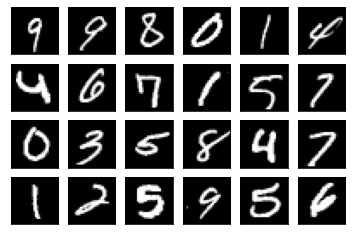

In [13]:
plot_images(im_train, 600, 4, 6)

Dans la cellule ci-dessous, on trie les images et on affiche des lignes de '0', des lignes de '1'... en noir sur fond blanc :

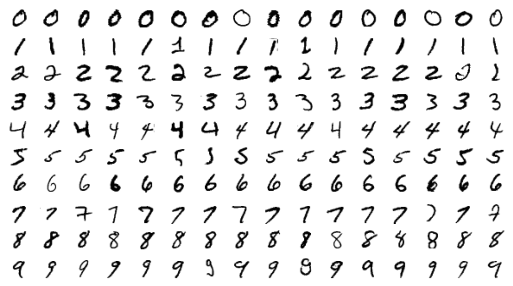

In [14]:
import matplotlib.pyplot as plt

data = []
for i in range(10):
    indexes = np.where(lab_train == i) # indices des labels égaux à i
    i_data = im_train[indexes][:16]    # tableau des images correspondates
    data.append(i_data)

plt.figure(figsize=(9,5))
L, C = len(data), len(data[0])
for row, digits in enumerate(data):
    for col, digit in enumerate(digits):
        plt.subplot(L, C , row*C + col + 1)
        plt.imshow(255-digit, cmap='gray')
        plt.xticks([]); plt.yticks([])
        plt.box(False)
plt.show()        

## Pré-traitement des données MNIST

Pour adapter les données à la couche d'entrée du réseau de neurones, on transforme les matrice d'entiers `uint8` représentant les images 28x28 pixels en vecteurs **normalisés** $(V_i)_{i=0..783}$ de 784 valeurs réelles $V_i$  avec $ 0 \leqslant V_i \leqslant 1$.

### Transformation des matrices d'entrée en vecteurs normalisés :

Pour éviter de "claquer en dur" le nombre d'images d'entraînement et de test ainsi que la dimension des images, on récupère ces données grâce aux attributs d'objets existants :
- l'attribut `shape` des tableaux `im_train` et `im_test` permet d'extraire le nombre d'images d'entraînement et de test,
- l'attribut `size` de la première image d'entraînement (par exemple) donne le nombre de pixel des images (784).

In [15]:
nb_im_train = im_train.shape[0]    # nombre d'images d'entraînement
nb_im_test  = im_test.shape[0]     # nombre d'images de test 
nb_pixel    = im_train[0].size     # nombre d'éléments (des pixels) de la première image 

Vérification :

In [16]:
print(f"{nb_im_train} images d'entraînement et {nb_im_test} images de test")
print(f"{nb_pixel} pixels dans chaque image")

60000 images d'entraînement et 10000 images de test
784 pixels dans chaque image


Définir maintenant les tableaux `x_train` et `x_test` contenant les matrices des tableaux `im_train` et `im_test` *mises à plat* sous forme de vecteurs normalisés (valeurs comprises entre 0 et 1).<br>
*indications* : utiliser la méthode `reshape` des tableaux ndarray de numpy et les paramètres `nb_im_train`, `nb_im_test` et `nb_pixel` calculés précédemment :

In [17]:
x_train = im_train.reshape(nb_im_train, nb_pixel)/im_train.max()
x_test  = im_test.reshape(nb_im_test, nb_pixel)/im_test.max()

Vérifier les dimensions des tableaux `x_train` et `x_test` :

In [18]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

Vérifier que les valeurs min et max des tableaux `x_train` et `x_test` sont bien celles attendues :

In [19]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [20]:
x_test.min(), x_test.max()

(0.0, 1.0)

###  Codage *one-hot*  des labels:

Consulter la documentation de la fonction `to_categorical` sur la page [tf.keras.utils.to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical)  et en déduire comment définir les tableaux `y_train` et `y_test` contenant la version encodée *hot-one* des tableaux `lab_train` et `lab_test` :

In [21]:
from tensorflow.keras.utils import to_categorical
# 'one-hot' encoding' des labels :
y_train = to_categorical(lab_train)
y_test  = to_categorical(lab_test)

Vérifier visuellement les 10 premières valeurs des tableaux `lab_train` et `y_train` :

In [22]:
print(lab_train[:10])
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## 3 - Construction du réseau de neurones

On va maintenant construire un réseau de neurones **séquentiel** dense en **5 lignes** Python à l'aide du module **keras**.

Après lecture de la page [guide/keras/sequential_model](https://www.tensorflow.org/guide/keras/sequential_model), construire le réseau  de façon incrémentale (méthode `add`) dans la cellule ci-dessous en suivant la démarche proposée :
- 1/ Créer l'objet `model` instance de la classe `Sequential` (cf [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)).
- 2/ Ajouter la couche d'entrée `Input(shape=<nombre de neurones>)` (cf [tf.keras.layers.InputLayer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/InputLayer)) pour spécifier la forme des données d'entrée. Utiliser le paramètre `nb_pixels`...<br>
- 3/ Ajouter les autres couches `Dense` (cf [tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)) :
    - couche 1 : `Dense(<nombre de neurones>, activation='relu')` (cf [tf.keras.activation.relu](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu))
    - couche 2 : `Dense(<nombre de neurones>, activation='softmax')` (cf [tf.keras.activation.softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax)).<br>
On pourra utiliser les paramètres `nb_pixels` et `nb_classes` pour indiquer le nombre de neurones sans les 'claquer en dur'...    
- 4/ Une fois construit, le réseau doit être compilé (au sens de tensorflow) avec la méthode `compile` et les arguments :
    - `loss='categorical_crossentropy'` : choix de la fonction d'erreur (cf [tf.keras.categorical_crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/categorical_crossentropy))
    - `optimizer='adam'` : choix de l'optimiseur Adam (cf page [tf.keras.optimizers.Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam))
    - `metrics=['accuracy']` pour obtenir les données permettant de tracer les courbes de performance.

In [23]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

nb_classe = 10
tf.random.set_seed(SEED)

# les 5 lignes pour construire le réseau de neurones:
model = Sequential()
model.add(Input(shape=(nb_pixel,), name='Input'))
model.add(Dense(nb_pixel, activation='relu', name='C1'))
model.add(Dense(nb_classe, activation='softmax', name='C2'))
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

Avec la méthode `summary` de l'objet `model`, faire afficher la description du modèle et vérivhier les dimensions...

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Dense)                   (None, 784)               615440    
_________________________________________________________________
C2 (Dense)                   (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


Pourquoi y-a-t-il des `None` dans la colonne "Output Shape"  ?

Retrouver le nombre total de paramètres avec une formule simple ...

In [25]:
785*784+785*10

623290

La fonction `plot_model` permet de dessiner la structure du réseau (voir la page [tf.keras.utils.plot_model](https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model)).<br>
Faire tracer la structure du modèle en ajoutant l'option `show_shapes=True` à l'appel de `plot_model` :

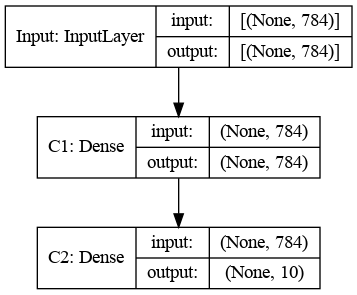

In [26]:
tf.keras.utils.plot_model(model, show_shapes=True)

*Remarque* : en utilisant l'argument nommé `name` dans la fonction `Dense`, on peut donner des noms personnalisés aux couches, qui apparaîtront dans les sorties de `summary` et de `plot_model`.

### Sauvegarde de l'état initial du  réseau

On peut sauvegarder l'état initial des poids du réseau non-entraîné (valeurs aléatoires) avec la méthode `save_weights` de la classe `Sequential`. <br>
Ce sera utile plus loin pour remettre le réseau à son état initial avant de relancer d'autres entraînements :

In [27]:
import os

# vérifier que le dossier 'weights' existe et sinon le créer:
if not os.path.isdir("weights"): os.mkdir("weights")

# sauvegarde des poinds du réseau initial:
key = 'model_initial'
model.save_weights('weights/'+key)

# afficher les fichiers créés:
files=[os.path.join("weights",f) for f in os.listdir("weights") if f.startswith(key)]
for f in files: print(f)

weights/model_initial.index
weights/model_initial.data-00000-of-00001


Remarque : la méthode `save_weights` utilise la partie `key` du chemin passé en argument pour préfixer les fichiers créés.<br>
Lors de la lecture ultérieure des poids du réseau avec la méthode `load_weights` de la classe `Sequential`, il suffira de donner la même information pour retrouver les bons fichiers.

## 4 - Entraînement du réseau

Consulter au besoin la documentation de la méthode `fit` sur la page [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential).

Compléter la cellule ci-dessous pour entraîner le réseau avec la méthode `fit` de l'objet `model` en utilisant les arguments :
- `x_train` : les 60000 images mises à plat et normalisées
- `y_train` : les 60000 labels encodés *one-hot*.
- `epochs=15` : faire 15 fois l'entraînement complet.
- `batch_size=128` : découper le jeu des données d'entrée (les 60000 images) en "lots" (*batch*) de taille `batch_size` (ici en lots de 128 images).<br>
La mise à jour des poids du réseau est faite par paquet de de `batch_size` images.<br>
La valeur de `batch_size` (par défaut : 32) est un paramètre qui influe sur la qualité de l'apprentissage mais aussi sur son empreinte mémoire : on pourra plus loin essayer différentes valeurs (64, 128, 256 ...) et observer comment évolue la qualité de l'entraînement).

In [28]:
# au cas on on exécute plusieurs fois cette cellule, on peut ré-initialiser 
# le réseau à son état initial si on veut comparer les entraînements...
key = 'model_initial'
model.load_weights('weights/'+key)  

hist = model.fit(x_train, y_train, 
                 epochs=15, 
                 batch_size=128)

Epoch 1/15
469/469 [==============================] - 2s 3ms/step - loss: 0.4285 - accuracy: 0.8766
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1028 - accuracy: 0.9705
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0625 - accuracy: 0.9817
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0428 - accuracy: 0.9873
Epoch 5/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0307 - accuracy: 0.9913
Epoch 6/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0217 - accuracy: 0.9940
Epoch 7/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0147 - accuracy: 0.9961
Epoch 8/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0114 - accuracy: 0.9972
Epoch 9/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0118 - accuracy: 0.9967
Epoch 10/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0054 - accuracy: 0.9988

L'objet `hist` retourné par la méthode `fit` possède un attribut `history` de type `dict` dont les clefs `'loss'` et `'accuracy'` sont associées aux informations correspondantes obtenues après chaque _epoch_ :

In [29]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

In [30]:
hist.history['loss']

[0.24681484699249268,
 0.0976438969373703,
 0.061336684972047806,
 0.04449426382780075,
 0.029721202328801155,
 0.021562039852142334,
 0.016506390646100044,
 0.01356653030961752,
 0.009761917404830456,
 0.006521678064018488,
 0.007711879443377256,
 0.010166194289922714,
 0.005589104723185301,
 0.003483909647911787,
 0.0031585681717842817]

In [31]:
hist.history['accuracy']

[0.9292333126068115,
 0.9710000157356262,
 0.9818166494369507,
 0.9864833354949951,
 0.9914166927337646,
 0.9940333366394043,
 0.9954333305358887,
 0.9962000250816345,
 0.9975166916847229,
 0.9984999895095825,
 0.9977166652679443,
 0.996749997138977,
 0.9984666705131531,
 0.9990666508674622,
 0.9991499781608582]

### Tracé des courbes `loss` et `accuracy` 

La fonction `plot_loss_accuracy` du module `utils.tools` (présent dans le répertoire du notebook) permet de tracer les courbes "fonction d'erreur" et "précision" sur la base des données stockées dans `hist`.<br> Importer et utiliser la fonction`plot_loss_accuracy` pour faire tracer ces courbes :

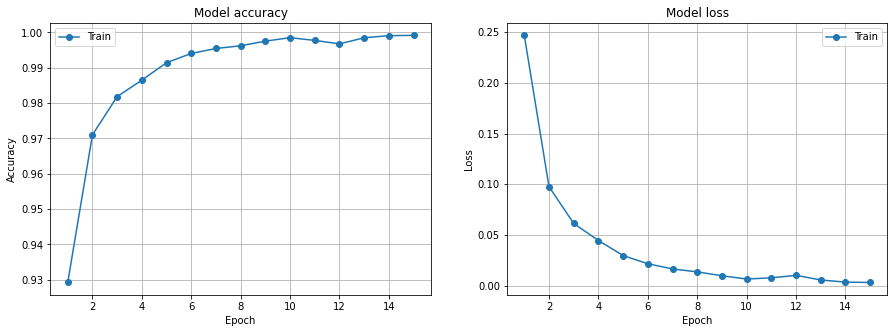

In [32]:
from utils.tools import plot_loss_accuracy
plot_loss_accuracy(hist)

### À propos de la reproductibilité de l'entraînement...

la reproductibilité parfaite d'un entraînement de réseau de neurones est parfois difficile à atteindre avec tensorflow....

Observe les résultats des cellules suivantes :


a/ Dans ce premier essai, le réseau est initialisé une fois, puis à chaque tour de boucle il est entraîné sur la base de son état au tour de boule précédent... `loss` et `accuracy` évoluent à chaque tour de boucle.<br>
$\leadsto$ c'est comme si on avait fait un `model.fit(x_train, y_train, epochs=10, batch_size=64)`

In [33]:
# recharger l'état initial du réseau:
key = 'model_initial'
model.load_weights('weights/'+key) 

for _ in range(10):
    hist = model.fit(x_train, y_train, epochs=1, batch_size=64)

938/938 [==============================] - 2s 2ms/step - loss: 0.0060 - accuracy: 0.9983


b/ Dans la cellule suivante, on réinitialise bien l'état initial du réseau **avant chaque lancement de `fit`** : c'est mieux, mais ce n'est pas encore parfait...

In [34]:
for _ in range(10):
    # recharger l'état initial du réseau:
    key = 'model_initial'
    model.load_weights('weights/'+key) 

    hist = model.fit(x_train, y_train, epochs=1, batch_size=64)

938/938 [==============================] - 2s 2ms/step - loss: 0.1935 - accuracy: 0.9431


c/ Et dans cet essai, on ré-initialise la graine tensorflow avec `tf.random.set_seed(SEED)` avant chaque invocation de `fit` : ce n'est toujours pas exactement les mêmes valeurs `loss` et `accuracy` que l'on observe, mais on en est très proche...

In [35]:
for _ in range(10):
    # recharger l'état initial du réseau:
    key = 'model_initial'
    model.load_weights('weights/'+key) 
    tf.random.set_seed(SEED)
    
    hist = model.fit(x_train, y_train, epochs=1, batch_size=64)

938/938 [==============================] - 3s 3ms/step - loss: 0.1935 - accuracy: 0.9429


## 5 - Entraînement du réseau avec test à chaque *epoch*

Pour avoir un indicateur réaliste de la qualité du réseau entraîné on peut tester à chaque `epoch` la précison des inférences du réseau entraîné en utilisant les données de test : il suffit de passer l'agument `validation_data` à la méthode `fit`, en lui affectant le tuple des données de test `(x_test, y_test)`

In [36]:
# recharger l'état initial du réseau:
key = 'model_initial'
model.load_weights('weights/'+key) 
tf.random.set_seed(SEED)

hist = model.fit(x_train, y_train,
                 validation_data=(x_test, y_test), 
                 epochs=15, 
                 batch_size=128)


Epoch 1/15
469/469 [==============================] - 2s 5ms/step - loss: 0.2309 - accuracy: 0.9324 - val_loss: 0.1209 - val_accuracy: 0.9630
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0936 - accuracy: 0.9724 - val_loss: 0.0858 - val_accuracy: 0.9730
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0610 - accuracy: 0.9815 - val_loss: 0.0736 - val_accuracy: 0.9773
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0450 - accuracy: 0.9865 - val_loss: 0.0612 - val_accuracy: 0.9802
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0308 - accuracy: 0.9912 - val_loss: 0.0648 - val_accuracy: 0.9791
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0228 - accuracy: 0.9940 - val_loss: 0.0594 - val_accuracy: 0.9811
Epoch 7/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0177 - accuracy: 0.9952 - val_loss: 0.0565 - val_accuracy: 0.9828
Epoch 

On a cette fois dans `hist.history` non seulement les clefs `loss` et `accuracy` mais aussi `val_loss` et `val_accuracy` calculées avec les données de test :

In [37]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Faire afficher ces courbes avec la fonction `plot_loss_accuracy` :

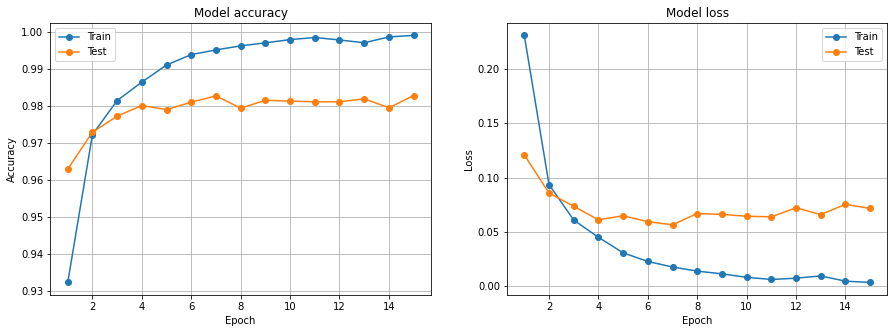

In [38]:
plot_loss_accuracy(hist)

On voit que la précision calculée avec les données de test tend vers une limite voisine de 98%. <br>
On pourrait penser qu'augmenter la valeur de `epochs` permet d'améliorer la précision du réseau... mais on court le risque de sur-entraînner le réseau (*over-fit*).

### Arrêter automatiquement l'entraînement avant *over-fit*

Keras propose des outils pour arrêter automatiquement l'apprentissage en surveillant par exemple la croissance de la précision d'une `epoch` à l'autre (cf le callback  [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)).


On peut ainsi définir une liste de fonctions *callback* que l'on peut passer en argument à la fonction `fit` avec l'agument nommé  `callbacks` :

Epoch 1/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1901 - accuracy: 0.9435 - val_loss: 0.0960 - val_accuracy: 0.9682
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0700 - accuracy: 0.9784 - val_loss: 0.0714 - val_accuracy: 0.9773
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0432 - accuracy: 0.9872 - val_loss: 0.0635 - val_accuracy: 0.9794
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0302 - accuracy: 0.9908 - val_loss: 0.0566 - val_accuracy: 0.9819
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0196 - accuracy: 0.9948 - val_loss: 0.0620 - val_accuracy: 0.9799
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0140 - accuracy: 0.9965 - val_loss: 0.0571 - val_accuracy: 0.9819
Restoring model weights from the end of the best epoch.
Epoch 00006: early stopping


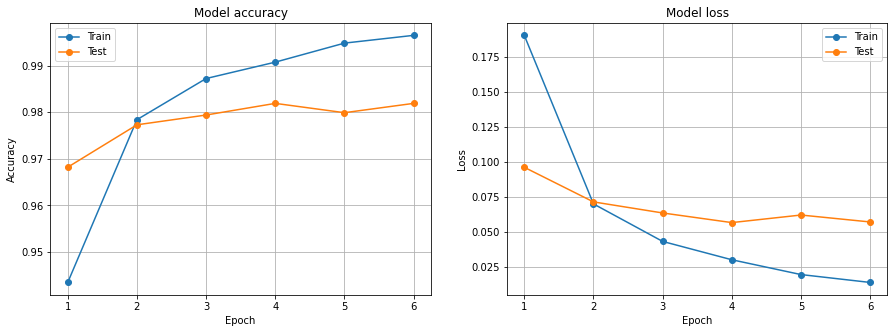

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

callbacks_list = [ 
    EarlyStopping(monitor='val_accuracy',  # la grandeur à surveiller
                  patience=2,              # accepter que 'val_accuracy' diminue 2 fois en tout
                  mode='max',              # arrêter si le paramètre décroît 
                  restore_best_weights=True,
                  verbose=1)
]

# recharger l'état initial du réseau:
key = 'model_initial'
model.load_weights('weights/'+key) 
tf.random.set_seed(SEED)

hist = model.fit(x_train, y_train,
                 validation_data=(x_test, y_test),
                 epochs=15, 
                 batch_size=128, 
                 callbacks = callbacks_list)

from utils.tools import plot_loss_accuracy
plot_loss_accuracy(hist)

Au lieu de surveiller la croissance du paramètre `val_accuracy`, on peut surveiller la décroissance de `val_loss` :

Epoch 1/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1983 - accuracy: 0.9403 - val_loss: 0.0989 - val_accuracy: 0.9685
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0735 - accuracy: 0.9777 - val_loss: 0.0730 - val_accuracy: 0.9768
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0455 - accuracy: 0.9865 - val_loss: 0.0646 - val_accuracy: 0.9803
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0321 - accuracy: 0.9902 - val_loss: 0.0540 - val_accuracy: 0.9815
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0208 - accuracy: 0.9944 - val_loss: 0.0599 - val_accuracy: 0.9805
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0147 - accuracy: 0.9961 - val_loss: 0.0600 - val_accuracy: 0.9811
Restoring model weights from the end of the best epoch.
Epoch 00006: early stopping


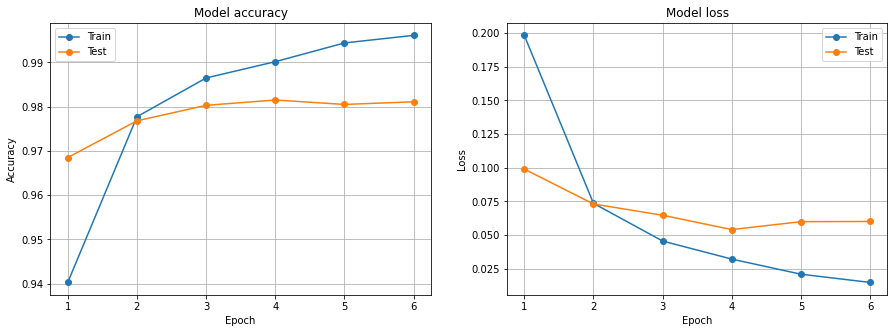

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

callbacks_list = [ 
    EarlyStopping(monitor='val_loss',  # la grandeur à surveiller
                  patience=2,          # accepter que 'val_accuracy' diminue 2 fois en tout
                  mode='min',          # arrêter si le paramètre croît 
                  restore_best_weights=True,
                  verbose=1)
]

# recharger l'état initial du réseau:
key = 'model_initial'
model.load_weights('weights/'+key) 
tf.random.set_seed(SEED)

hist = model.fit(x_train, y_train,
                 validation_data=(x_test, y_test),
                 epochs=15, 
                 batch_size=128, 
                 callbacks = callbacks_list)

from utils.tools import plot_loss_accuracy
plot_loss_accuracy(hist)

### Sauvegarder les poids du  réseau entraîné

Pour sauvegarder les **poids** d'un réseau entraïné dans un fichier, on utilise la méthode `save_weights` de la classe `Sequential`:

In [41]:
import os
# vérifier que le dossier 'weights' existe et sinon le créer:
if not os.path.exists("weights"): os.mkdir("weights")

# sauvegarde des poids du réseau entrainé:
key = 'model_trained'
model.save_weights('weights/'+key)

# afficher les fichiers créés:
files=[os.path.join("weights",f) for f in os.listdir("weights") if f.startswith(key)]
for f in files: print(f)

weights/model_trained.data-00000-of-00001
weights/model_trained.index


### Sauvegarder la structure du réseau et ses poids

La méthode `save` de la classe `Sequential` permet d'enregistrer dans des fichiers **toute la structure et les poids** du réseau entraïné.<br />
$\leadsto$ Ceci permet de recréer plus tard *from scratch* le réseau entrainé pour passer en phase exploitation du réseau par exemple, en utilisant la fonction`tf.keras.models.load_model` :

In [42]:
import os
# vérifier que le dossier 'weights' existe et sinon le créer:
if not os.path.exists("models"): os.mkdir("models")

# sauvegarder structure réseau + poids :
key = 'model'
model.save('models/'+key) 

# afficher les fichiers créés:
files=[os.path.join("models",f) for f in os.listdir("models") if f.startswith(key)]
for f in files: print(f)

INFO:tensorflow:Assets written to: models/model/assets
models/model


## 6/ Exploitation du réseau avec le jeu de test

La méthode `predict` de l'objet `model` permet de calculer les inférences du réseau pour une ou plusieurs entrées (voir la méthode `predict`dans la page [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)).

La cellule ci-dessous montre la mise en oeuvre de la méthode `predict`, et comment exploiter la représentation  *one-hot* renvoyée par `fit` en utilisant la méthode `argmax` des tableaux de numpy :

sortie du réseau pour l'image n° 100 :
[1.03626458e-04 2.38534926e-06 1.29261525e-05 3.03534819e-07
 2.00557997e-06 6.88425353e-05 9.99772131e-01 4.28824751e-06
 3.30566618e-05 5.96428322e-07]

sortie du réseau arrondie à 1 chiffre : [0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0]
rep[0].argmax() donne : 6

La bonne réponse est 6, soit en 'one-hot' : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


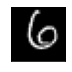

In [43]:
i = 100   # numéro image de test
rep = model.predict(x_test[i:i+1]) # Attention: x doit être un tableau de matrices...
                                   # => x[i] ne convient pas !

print(f"sortie du réseau pour l'image n° {i} :\n{rep[0]}")

# limiter l'affichage des composantes des tableaux numpy à 1 chiffre :    
with np.printoptions(formatter={'float':'{:.1f}'.format}):    
    print(f"\nsortie du réseau arrondie à 1 chiffre : {rep[0]}")
    
print(f"rep[0].argmax() donne : {rep[0].argmax()}")

print(f"\nLa bonne réponse est {lab_test[i]}, soit en 'one-hot' : {y_test[i]}")

plot_images(im_test,i,1,1)

#### Utilité de la méthode `ndarray.argmax` de numpy pour décoder le tableau de vecteurs *one-hot* renvoyé par la méthode `predict`

Quand on calcule une inférence du réseau `model` avec les données de test par exemple, on obtient un résultat qui est un tableau de vecteurs  :

In [44]:
results = model.predict(x_test)

print("forme du tableau 'results':", results.shape)
print("allure des vecteurs du tableau 'result' :")
with np.printoptions(formatter={'float':'{:.4f}'.format}): 
    print("results[0]  :", results[0])
    print("results[-1] :", results[-1])

forme du tableau 'results': (10000, 10)
allure des vecteurs du tableau 'result' :
results[0]  : [0.0000 0.0000 0.0000 0.0005 0.0000 0.0000 0.0000 0.9994 0.0000 0.0000]
results[-1] : [0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000]


En écrivant `results.argmax(axe=-1)`, on obtient le tableau des `argmax` de chaque vecteur -> c'est directement le tableau des chiffres reconnus par le réseau :

In [45]:
chiffres_reconnus = results.argmax(axis=-1)

print("chiffres_reconnus -> shape:", chiffres_reconnus.shape, ", dtype:", chiffres_reconnus.dtype)
print(f"contenu de chiffres_reconnus : {chiffres_reconnus}")

chiffres_reconnus -> shape: (10000,) , dtype: int64
contenu de chiffres_reconnus : [7 2 1 ... 4 5 6]


Retrouver le taux de réussite du réseau entrainé en utilisant les inférences du réseau pour les entrées `x_test` et les labels `lab_test` :

In [46]:
results = model.predict(x_test)
chiffres_reconnus = results.argmax(axis=-1)

success = 0
for chiffre, label in zip(chiffres_reconnus, lab_test):
    success += (chiffre == label)
print(f"taux de réussite : {success/len(x_test)*100:.2f} %")

taux de réussite : 98.15 %


###  Afficher la matrice de confusion

La cellule suivante définie la fonction `show_cm_mnist` qui affiche la **matrice de confusion**.

La matrice de confusion permet de visualiser :
- sur la diagonale : les bonnes réponses du réseau, avec dans chaque case le nombre de bonnes réponses
- hors diagonale : les erreurs du réseau, avec dans chaque case la fréquence d'apparition de l'erreur.

In [47]:
import pandas as pd
from seaborn import heatmap
from sklearn.metrics import confusion_matrix

def show_cm_mnist(target, results, classes):
    # target  : the actual labels (one-hot format)
    # results : the labels computed by the trained network (one-hot format)
    # classes : list of possible label values
    predicted = np.argmax(results, axis=-1) # tableau d'entiers entre 0 et 9 
    cm = confusion_matrix(target, predicted)
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    plt.figure(figsize=(11,9))
    heatmap(df_cm, annot=True, cbar=False, fmt="4d")
    plt.xlabel('preticted label')
    plt.ylabel('actual label')
    plt.show()

Faire afficher la matrice de confusion en lui passant les labels attendus `lab_test` et les labels calculés par le model :

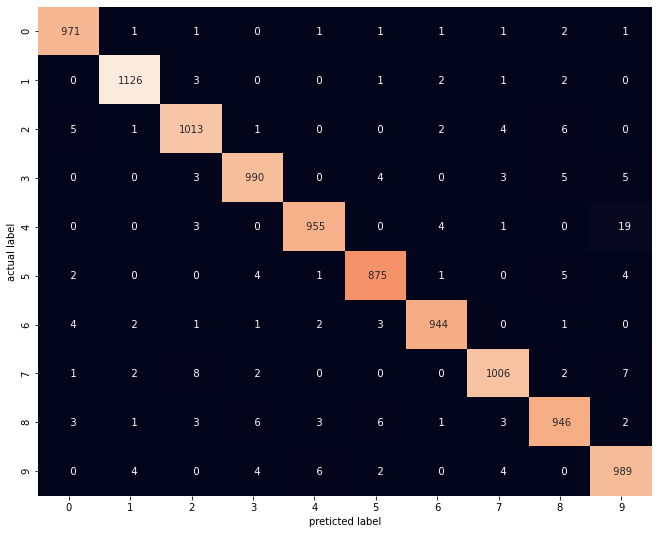

In [48]:
show_cm_mnist(lab_test, results, range(nb_classe))

# D/ Bonus

 ## Réseau profond : augmenter le nombre de couches cachées 
 
 On peut essayer de construire un réseau avec plus de couches. Par exemple :
- couche d'entrée avec les 784 pixels
- couche cachée 1 : 500 neurones, fonction d'activation `relu`
- couche cachée 2 : 400 neurones, fonction d'activation `relu`
- couche de sortie : 10 neurone, fonction d'activation `softmax`.

Écrire une fonction paramétrée `build_nn` qui effectue les opérations suivantes:
- Construire un réseau de neurones dense dédié à la reconnaissance des chiffres MNIST avec un nombre de données d'entrée, de neurones par couche et de neurones dans la dernière couche donnés en paramétres.
- Entraîner le réseau avec test à la fin de chaque `epoch` et arrêt automatique basé sur la surveillance de `val_accuracy` .
- Afficher les courbes 'Model Loss' et 'Model accuracy' du réseau entraîné.
- Afficher la matrice de confusion.

Par exemple, pour créer, entraîner et tester le réseau profond suggéré ci-dessus, on pourrait écrire :<br>

    data = (x_train, y_train, x_test, y_test)
    tf.random.set_seed(SEED)
    my_model1 = build_mn(784, (500, 400), 10, data, batch_size=64)

In [49]:
# définition de la fonction build_nn
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

from utils.tools import plot_loss_accuracy
from utils.tools import show_cm_mnist

def build_nn(nb_input, layers, nb_classe, data, epoch=15, batch_size=64, patience=5):

    x_train, y_train, x_test, y_test = data
        
    model = Sequential()
    model.add(Input(shape=(nb_input,)))
    for nb_neurone in layers:
        model.add(Dense(nb_neurone, activation='relu'))
    model.add(Dense(nb_classe, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.summary()
    tf.keras.utils.plot_model(model, show_shapes=True)
    
    callbacks_list = [ 
    EarlyStopping(monitor='val_accuracy',  # la grandeur à surveiller
                  patience=patience,       # accepter que 'val_accuracy' diminue 'patience' fois de suite
                  restore_best_weights=True,
                  verbose=1)
    ]

    hist = model.fit(x_train, y_train, 
                     validation_data=(x_test, y_test), 
                     epochs=epoch, 
                     batch_size=batch_size,
                     callbacks=callbacks_list)
    
    plot_loss_accuracy(hist)
    
    show_cm_mnist(lab_test, model.predict(x_test), range(nb_classe))
    
    return model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_4 (Dense)              (None, 400)               200400    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                4010      
Total params: 596,910
Trainable params: 596,910
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
938/938 [==============================] - 4s 3ms/step - loss: 0.3509 - accuracy: 0.8954 - val_loss: 0.0862 - val_accuracy: 0.9733
Epoch 2/15
938/938 [==============================] - 3s 3ms/step - loss: 0.0806 - accuracy: 0.9754 - val_loss: 0.0849 - val_accuracy: 0.9717
Epoch 3/15
938/938 [==============================] - 3s 3ms/step - loss: 0.0465 - accuracy: 0

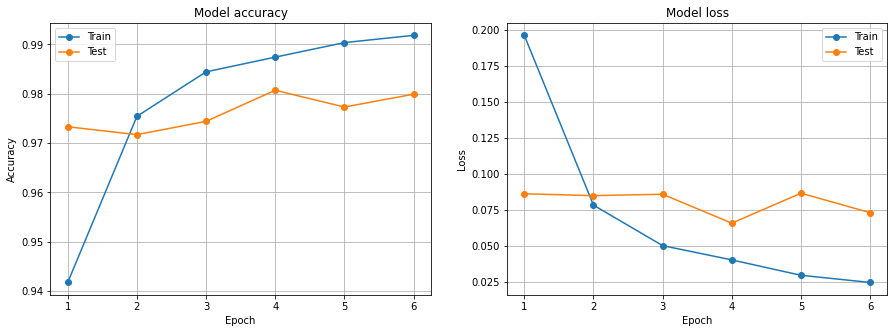

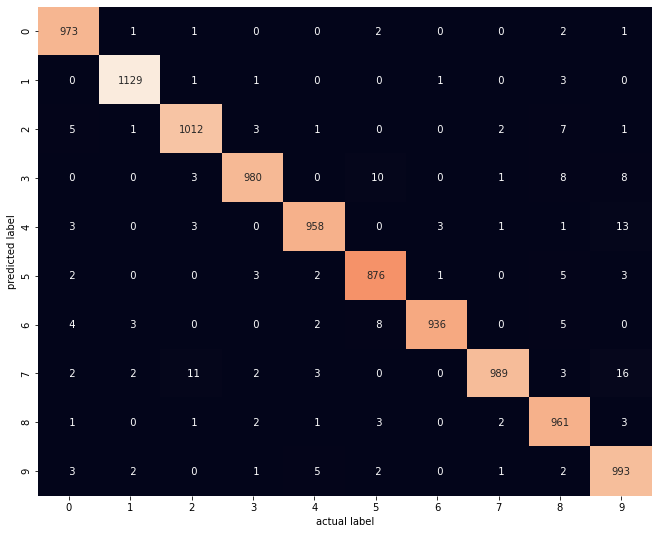

In [51]:
# utilisation de build_nn :
data = (x_train, y_train, x_test, y_test)
tf.random.set_seed(SEED)

my_model1 = build_nn(784, (500, 400), 10, data, batch_size=64, patience=2)

Quel est l'impact de l'augmentation du nombre de couches du réseau ?<br>

# La suite....

Pour aller au-delà des 98% de reconnaissance des chiffres MNIST et une meilleure reconnaissance des 'images perso', il faut passer à une architecture de réseau plus adaptée au traitement des images : les réseaux __convolutifs__, traités dans le notebook `TP2_MNIST_convol.ipynb`.

# Autres ressources intéressantes... des vidéos :

In [4]:
%%HTML
<iframe src="https://www.youtube.com/embed/trWrEWfhTVg" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [3]:
%%HTML
<iframe src="https://www.youtube.com/embed/aircAruvnKk" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [6]:
%%HTML
<iframe src="https://www.youtube.com/embed/IHZwWFHWa-w" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [7]:
%%HTML
<iframe src="https://www.youtube.com/embed/Ilg3gGewQ5U" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>